In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt

class STWaveCrest:
    def __init__(self, x0, t0, A0, c, dir='+'):
        self.x0 = x0   ##position
        self.t0 = t0   ##time
        self.A0 = A0   ##amplitude
        self.c  = c    ##velocity
        assert dir in ['+', '-']
        self.dir = dir ##direction
        
    def propagate(self, dt):
        if self.dir=='+':
            x1 = self.x0 + self.c*dt
            t1 = self.t0 + dt
            A1 = self.A0
            c1 = self.c
            dir = self.dir
            
            return STWaveCrest(x1, t1, A1, c1, dir)
        elif self.dir=='-':
            x1 = self.x0 - self.c*dt
            t1 = self.t0 + dt
            A1 = self.A0
            c1 = self.c
            dir = self.dir
            
            return STWaveCrest(x1, t1, A1, c1, dir)
        
    def divide(self, T_co, T_contra, c_co, c_contra):
        Ap, Am = None, None
        cp, cm = None, None
        if self.dir=='+':
            Ap = self.A0*T_co
            Am = self.A0*T_contra
            cp = c_co
            cm = c_contra
        elif self.dir=='-':
            Am = self.A0*T_co
            Ap = self.A0*T_contra
            cm = c_co
            cp = c_contra
            
        stw_p = STWaveCrest(self.x0, self.t0, Ap, cp, '+') 
        stw_m = STWaveCrest(self.x0, self.t0, Am, cm, '-') 
        return stw_p, stw_m

    
    def divide_co(self, T_co_0, T_co_1, c_co_0, c_co_1):
        Ac0 = self.A0*T_co_0
        Ac1 = self.A0*T_co_1
        cc0 = c_co_0
        cc1 = c_co_1
            
        stw_p0 = STWaveCrest(self.x0, self.t0, Ac0, cc0, self.dir) 
        stw_p1 = STWaveCrest(self.x0, self.t0, Ac1, cc1, self.dir) 
        return stw_p0, stw_p1
    
            
    def plot(self, stw_0, stw_1):
        x0, t0 = stw_0.x0, stw_0.t0
        x1, t1 = stw_1.x0, stw_1.t0
        
        plt.plot([x0, x1], [t0, t1], 'b')
    
    
    def propagate_plot(self, dt):
        stw_1 = self.propagate(dt)
        self.plot(self, stw_1)
        return stw_1
    

class STWaveCrestArray:
    
    def init_PW(self, Nx, X, x0, t0, A0, c, dir='+'):
        self.STWarr = [None]*Nx
        for i in range(Nx):
            x = x0 + i*X
            self.STWarr[i] = STWaveCrest(x, t0, A0, c, dir=dir)
        

    def propagate_plot(self, dt):
        STWarr = []
        for i in range(len(self.STWarr)):
            STWarr.append(self.STWarr[i].propagate_plot(dt))
        self.STWarr = STWarr
        #print(self.STWarr[-1].t0)
        
        
    def divide(self, T_co, T_contra, c_co, c_contra):
        STWarr = []
        for i in range(len(self.STWarr)):
            STWarr.extend(self.STWarr[i].divide(T_co, T_contra, c_co, c_contra))
        self.STWarr = STWarr
        
    def divide_co(self, T_co_0, T_co_1, c_co_0, c_co_1):
        STWarr = []
        for i in range(len(self.STWarr)):
            STWarr.extend(self.STWarr[i].divide_co(T_co_0, T_co_1, c_co_0, c_co_1))
        self.STWarr = STWarr
        
        

Populating the interactive namespace from numpy and matplotlib


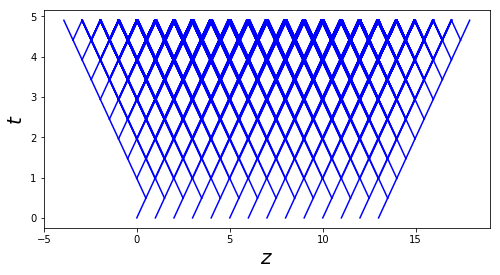

In [16]:

figsize(8, 4)

stw_arr = STWaveCrestArray()
stw_arr.init_PW(Nx=14, X=1.0, x0=0.0, t0=0.0, A0=1.0, c=1.0, dir='+')

dt = 0.49
for i in range(10):
    stw_arr.propagate_plot(dt)
    stw_arr.divide(T_co=0.5, T_contra=0.5, c_co=1.0, c_contra=1.0)

xlabel('$z$', fontsize=20)
ylabel('$t$', fontsize=20)
#xlim(-5, 15)
#ylim(0, 10)

savefig('other/4.png')

show()

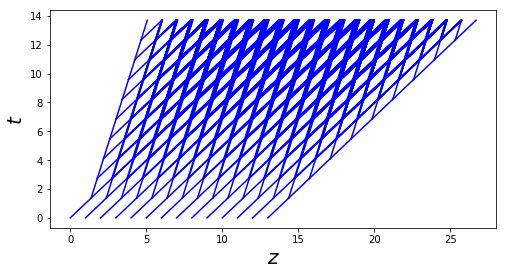

In [15]:

figsize(8, 4)

stw_arr = STWaveCrestArray()
stw_arr.init_PW(Nx=14, X=1.0, x0=0.0, t0=0.0, A0=1.0, c=1.0, dir='+')

dt = 1.37
for i in range(10):
    stw_arr.propagate_plot(dt)
    stw_arr.divide_co(T_co_0=0.5, T_co_1=0.5, c_co_0=1.0, c_co_1=0.3)

xlabel('$z$', fontsize=20)
ylabel('$t$', fontsize=20)
#xlim(0, 20)
#ylim(0, 10)

savefig('other/8.png')

show()